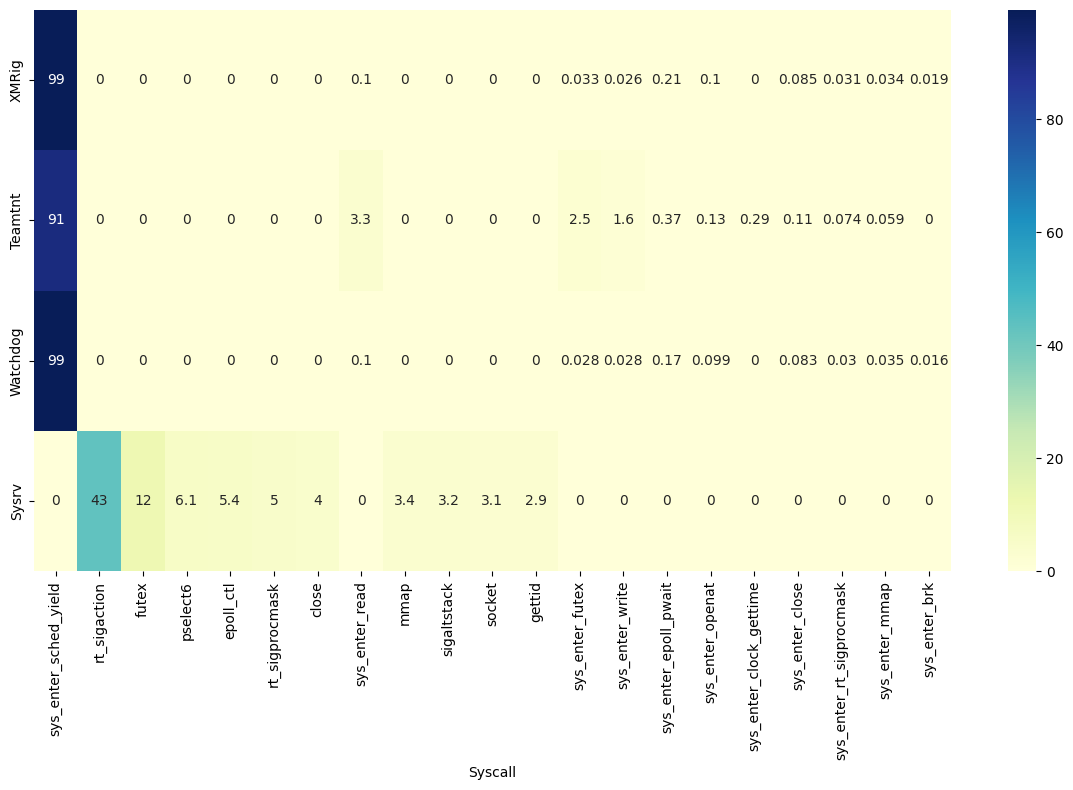

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
xmrig_syscalls = [('sys_enter_sched_yield', 2491862),
 ('sys_enter_epoll_pwait', 5357),
 ('sys_enter_read', 2627),
 ('sys_enter_openat', 2621),
 ('sys_enter_close', 2128),
 ('sys_enter_mmap', 865),
 ('sys_enter_futex', 833),
 ('sys_enter_rt_sigprocmask', 786),
 ('sys_enter_write', 658),
 ('sys_enter_brk', 486),
 ('sys_enter_mprotect', 299),
 ('sys_enter_newfstatat', 287),
 ('sys_enter_epoll_ctl', 287),
 ('sys_enter_fcntl', 210),
 ('sys_enter_writev', 206),
 ('sys_enter_getdents64', 138),
 ('sys_enter_sched_setaffinity', 135),
 ('sys_enter_set_robust_list', 126),
 ('sys_enter_rseq', 126),
 ('sys_enter_clone3', 117),
 ('sys_enter_rt_sigaction', 114),
 ('sys_enter_ioctl', 114),
 ('sys_enter_munmap', 107)]

teamtnt_syscalls = [('sys_enter_sched_yield', 654900),
 ('sys_enter_read', 23473),
 ('sys_enter_futex', 17854),
 ('sys_enter_write', 11589),
 ('sys_enter_epoll_pwait', 2665),
 ('sys_enter_clock_gettime', 2075),
 ('sys_enter_openat', 923),
 ('sys_enter_close', 779),
 ('sys_enter_rt_sigprocmask', 527),
 ('sys_enter_mmap', 424),
 ('sys_enter_brk', 217),
 ('sys_enter_mprotect', 117),
 ('sys_enter_writev', 110),
 ('sys_enter_set_robust_list', 86),
 ('sys_enter_rseq', 86),
 ('sys_enter_sched_setaffinity', 86),
 ('sys_enter_epoll_ctl', 86),
 ('sys_enter_exit', 86),
 ('sys_enter_clone3', 84),
 ('sys_enter_munmap', 75),
 ('sys_enter_clock_nanosleep', 68),
 ('sys_enter_madvise', 67),
 ('sys_enter_fcntl', 64)]

watchdog_syscalls = [('sys_enter_sched_yield', 504957),
 ('sys_enter_epoll_pwait', 845),
 ('sys_enter_read', 513),
 ('sys_enter_openat', 504),
 ('sys_enter_close', 421),
 ('sys_enter_mmap', 177),
 ('sys_enter_rt_sigprocmask', 153),
 ('sys_enter_futex', 143),
 ('sys_enter_write', 141),
 ('sys_enter_brk', 80),
 ('sys_enter_newfstatat', 64),
 ('sys_enter_mprotect', 62),
 ('sys_enter_epoll_ctl', 58),
 ('sys_enter_fcntl', 41),
 ('sys_enter_writev', 34),
 ('sys_enter_set_robust_list', 28),
 ('sys_enter_rseq', 28),
 ('sys_enter_getdents64', 28),
 ('sys_enter_sched_setaffinity', 27),
 ('sys_enter_clone3', 26),
 ('sys_enter_rt_sigaction', 21),
 ('sys_enter_ioctl', 21),
 ('sys_enter_munmap', 20)]

sysrv_syscalls = [('rt_sigaction', 245263734),
 ('futex', 65807359),
 ('pselect6', 34400042),
 ('epoll_ctl', 30708274),
 ('rt_sigprocmask', 28116221),
 ('close', 22857227),
 ('mmap', 19453332),
 ('sigaltstack', 18104712),
 ('socket', 17259711),
 ('gettid', 16292961),
 ('setsockopt', 16139847),
 ('connect', 13899104),
 ('clone', 9053258),
 ('read', 5568551),
 ('openat', 3744326),
 ('getpid', 3623530),
 ('getppid', 3622755),
 ('bind', 2240276),
 ('munmap', 1924682),
 ('pipe2', 1812125),
 ('execve', 1812059),
 ('chdir', 1811519),
 ('sched_getaffinity', 1811475)]

# Calculate percentages
total_xmrig_calls = sum(value for _, value in xmrig_syscalls)
total_teamtnt_calls = sum(value for _, value in teamtnt_syscalls)
total_watchdog_calls = sum(value for _, value in watchdog_syscalls)
total_sysrv_calls = sum(value for _, value in sysrv_syscalls)

xmrig_syscalls_percent = [(label, value / total_xmrig_calls * 100) for label, value in xmrig_syscalls]
teamtnt_syscalls_percent = [(label, value / total_teamtnt_calls * 100) for label, value in teamtnt_syscalls]
watchdog_syscalls_percent = [(label, value / total_watchdog_calls * 100) for label, value in watchdog_syscalls]
sysrv_syscalls_percent = [(label, value / total_sysrv_calls * 100) for label, value in sysrv_syscalls]

# Sort by percentage
xmrig_syscalls_sorted = sorted(xmrig_syscalls_percent, key=lambda x: x[1], reverse=True)
teamtnt_syscalls_sorted = sorted(teamtnt_syscalls_percent, key=lambda x: x[1], reverse=True)
watchdog_syscalls_sorted = sorted(watchdog_syscalls_percent, key=lambda x: x[1], reverse=True)
sysrv_syscalls_sorted = sorted(sysrv_syscalls_percent, key=lambda x: x[1], reverse=True)

# Extracting top 10 syscalls for each
top_xmrig_syscalls = xmrig_syscalls_sorted[:10]
top_teamtnt_syscalls = teamtnt_syscalls_sorted[:10]
top_watchdog_syscalls = watchdog_syscalls_sorted[:10]
top_sysrv_syscalls = sysrv_syscalls_sorted[:10]

# Merging the two lists and finding unique syscalls
top_syscalls = list(set([syscall for syscall, _ in top_xmrig_syscalls + top_teamtnt_syscalls + top_watchdog_syscalls + top_sysrv_syscalls]))

# Creating dictionaries for quick lookup
xmrig_dict = dict(top_xmrig_syscalls)
teamtnt_dict = dict(top_teamtnt_syscalls)
watchdog_dict = dict(top_watchdog_syscalls)
sysrv_dict = dict(top_sysrv_syscalls)

# Preparing data for plotting, sorted by percentage sum of both programs
top_labels_sorted = sorted(top_syscalls, key=lambda label: (xmrig_dict.get(label, 0) + teamtnt_dict.get(label, 0) + watchdog_dict.get(label, 0) + sysrv_dict.get(label, 0)), reverse=True)
top_xmrig_values_sorted = [xmrig_dict.get(label, 0) for label in top_labels_sorted]
top_teamtnt_values_sorted = [teamtnt_dict.get(label, 0) for label in top_labels_sorted]
top_watchdog_values_sorted = [watchdog_dict.get(label, 0) for label in top_labels_sorted]
top_sysrv_values_sorted = [sysrv_dict.get(label, 0) for label in top_labels_sorted]

# Creating DataFrame for heatmap
data = {
    'Syscall': top_labels_sorted,
    'XMRig': top_xmrig_values_sorted,
    'Teamtnt': top_teamtnt_values_sorted,
    'Watchdog': top_watchdog_values_sorted,
    'Sysrv': top_sysrv_values_sorted
}
df = pd.DataFrame(data)
df.set_index('Syscall', inplace=True)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.T, annot=True, cmap="YlGnBu", cbar=True, ax=ax)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()